## Classification Implementation

In [1]:
#### Importing libraries
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
## Getting data From source
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()


Bad key text.latex.preview in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'sepal-length by petal-length'}, xlabel='sepal-length', ylabel='petal-length'>

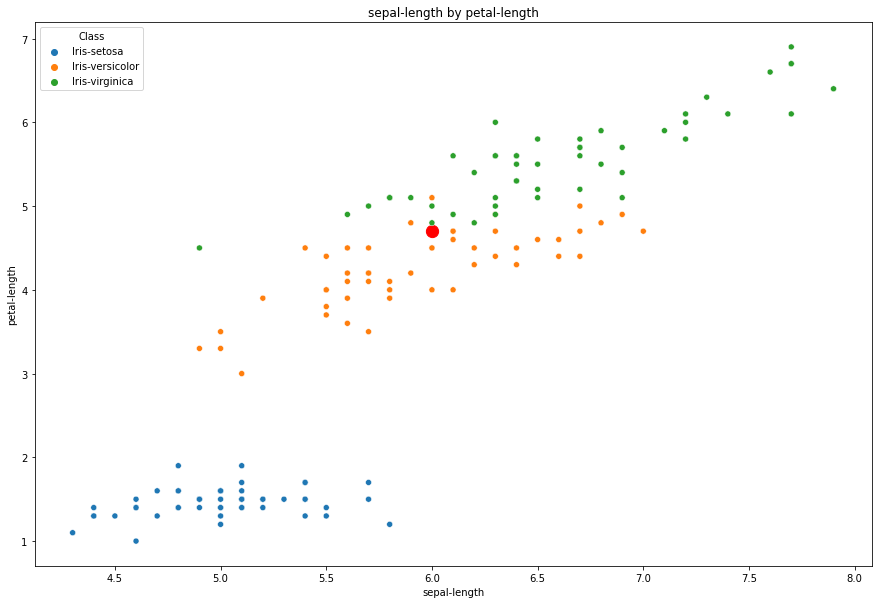

In [2]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("sepal-length by petal-length")
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.scatter([6], [4.7], color='red',s=150)
plt.legend()
sns.scatterplot(x='sepal-length',y='petal-length',data=dataset,hue='Class')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'sepal-width by petal-width'}, xlabel='sepal-width', ylabel='petal-width'>

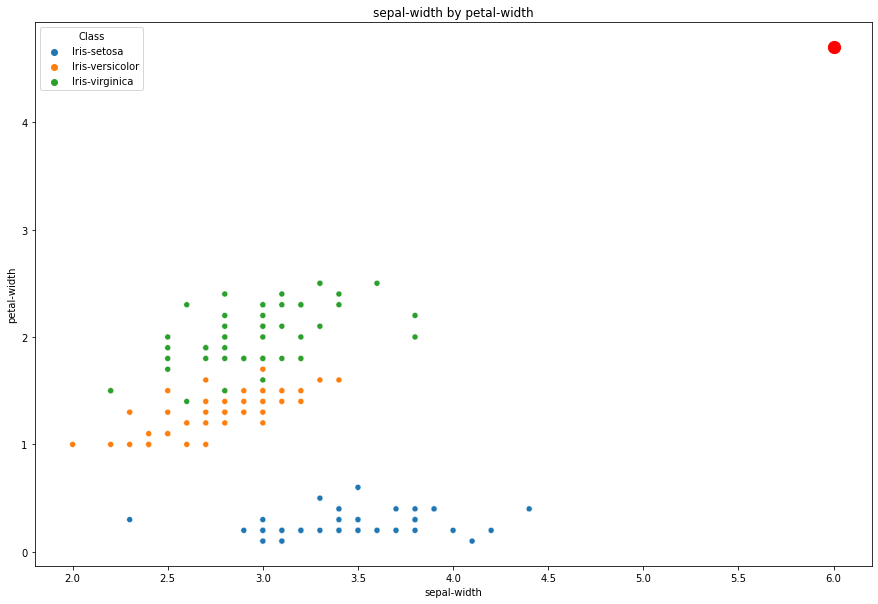

In [3]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("sepal-width by petal-width")
plt.xlabel('sepal-width')
plt.ylabel('petal-width')
plt.scatter([6], [4.7], color='red',s=150)
plt.legend()
sns.scatterplot(x='sepal-width',y='petal-width',data=dataset,hue='Class')

#### Steps for KNN

##### Step 1. Import the libraries(Done Above)



###### Step 2. Load the dataset(Done above)

##### Step 3. Train Test Split



In [95]:
dataset.columns=[x.replace("-","_") for x in dataset.columns]
data=dataset.copy()
data.columns=[x.replace("-","_") for x in data.columns]
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)

In [96]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [97]:
mean_train_set = train_data.mean()
mean_test_set = test_data.mean()
std_train_set = train_data.std()
std_test_set = test_data.std()

/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_32205/3258064851.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_train_set = train_data.mean()
/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_32205/3258064851.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_test_set = test_data.mean()
/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_32205/3258064851.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_train_set = train_data.std()
/var/

In [98]:
test_class = list(test_data.iloc[:,-1])
dev_class = list(train_data.iloc[:,-1])

##### Step 4.

Define functions to compute the value of the distance metrics: Euclidean, Normalized Euclidean and Cosine Similarity¹



In [100]:
row1

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: object

In [101]:
row2

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 1, dtype: object

In [102]:
def euclideanDistance(data_1, data_2):
    dist = 0
    return np.sqrt(sum(abs(data_1-data_2[data_1.index])*abs(data_1-data_2[data_1.index])))
    #for i in range(data_len):
    #    dist = dist + np.square(data_1[i] - data_2[i])
    #return np.sqrt(dist)

In [103]:
mean_train_set

sepal_length    5.837500
sepal_width     3.065000
petal_length    3.755833
petal_width     1.193333
dtype: float64

In [104]:
row1

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: object

In [105]:
row1.index

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [113]:
row1

sepal_length   -0.923932
sepal_width     1.015096
petal_length   -1.340322
petal_width    -1.305496
dtype: object

In [124]:
type(row1.index)

pandas.core.indexes.base.Index

In [130]:
1/3

0.3333333333333333

In [125]:
euclideanDistance(row1,row2)

1.1933768819842514

In [129]:
row1=dataset.iloc[0][:4]
row2=dataset.iloc[1][:4]

In [148]:
np.sqrt(5)[0]

IndexError: invalid index to scalar variable.

In [131]:


#def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
#    n_dist = 0
#    for i in range(data_len):
#        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
#    return np.sqrt(n_dist)


def normalizedEuclideanDistance(row1, row2, data_len, mean_train_set, std_train_set):
    row1=(row1-mean_train_set.loc[list(row1.index)])/std_train_set.loc[list(row1.index)]
    row2=(row2-mean_train_set.loc[list(row2.index)])/std_train_set.loc[list(row2.index)]
    return euclideanDistance(row1,row2)


In [133]:
normalizedEuclideanDistance(row1,row2,4,mean_train_set,std_train_set)

1.1933768819842514

$\overrightarrow{A}$<br>
$\overrightarrow{B}$<br>
Dot product
$\overrightarrow{A}$ <b>.</b> $\overrightarrow{B}$ = |A||B|cos$\theta$	

In [136]:


def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)


- If x is decreasing between 0 to 90 degrees then - x will be increasing in the same range
- If x is increasing between 0 to 90 degrees then constant + x will be increasing in the same range
- If x is increasing between 0 to 90 degrees then constant - x will be decreasing in the same range


In [137]:
##### Define the function to return k-Nearest Neighbors²



In [138]:
train_data

,sepal_length,sepal_width,petal_length,petal_width,Class
14,5.8,4.0,1.2,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
...,...,...,...,...,...
107,7.3,2.9,6.3,1.8,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica


sepal_length    4.6
sepal_width     3.2
petal_length    1.4
petal_width     0.2
Name: 47, dtype: object

In [143]:
test_instance=test_data.iloc[0][:4]

In [144]:
test_instance.shape

(4,)

In [149]:
train_data['distance']=train_data.apply(lambda row:euclideanDistance(test_instance,row),axis=1)

In [172]:
train_data[train_data['distance']<=train_data['distance'].nsmallest(3).max()]['Class'].value_counts().index[0]

'Iris-setosa'

Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: Class, dtype: int64

In [162]:
k=3


'Iris-setosa'

In [ ]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std):
    # Dictionary to store Distances of each instance from training data
    distances = {}
    if dist_method == 'euclidean':
        dataset['distance']=train_data.apply(lambda row:euclideanDistance(test_instance,row),axis=1)
        return train_data[train_data['distance']<=train_data['distance'].nsmallest(k).iloc[-1]]['Class'].value_counts().index[0]
    

    
        
    
    

In [11]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    # Dictionary to store Distances of each instance from training data
    distances = {}
    
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

##### Step 5.

Using the train dataset, iterate over all of the development data instances and compute the class for each k value and each distance metric.



#### Assignment is to make a function to find out the optimal value of K the function should have the following properties:
- It should take range of k and test dataset. 
- It should return optimal value of k from the given list of K
- It should use knn function to find the class

In [13]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in train_data.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(train_data, pd.DataFrame(row_list[i]), k, dist_method, mean_train_set, std_train_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
#print(obs_k)


##### Compute the accuracy for the development set



In [14]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

   k  euclidean  normalized_euclidean    cosine
0  1   1.000000              1.000000  1.000000
1  3   0.966667              0.958333  0.983333
2  5   0.966667              0.958333  0.983333
3  7   0.975000              0.950000  0.991667


[Text(0, 0.5, 'Accuracy')]

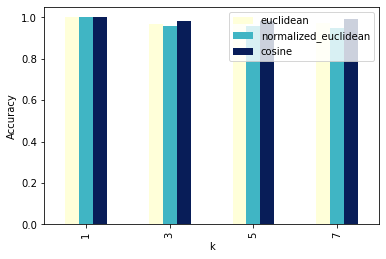

In [15]:
# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')


In [17]:
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax()
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')




Best k value is 1 and best distance metric is euclidean .


##### Step 7.



In [18]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list_test = []
for index, rows in test_data.iterrows(): 
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(knn(test_data, pd.DataFrame(row_list_test[i]), best_k, best_dist_method, mean_test_set, std_test_set))
#print(test_set_obs)

count = 0
for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)

Final Accuracy of the Test dataset is  1.0


### KNN For diabetes Prediction

In [173]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

#### Explore data

In [174]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
df.shape


(768, 9)

In [176]:
#umpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [177]:
# Stratify is used to have same distribution of y in train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21, stratify=y)


##### Classifier using k-Nearest Neighbors algorithm.



###### Optimising values of K for accuracies

In [179]:
np.empty(len(neighbors))

array([0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000,
       0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000, 5.e-324,
       5.e-324, 5.e-324, 5.e-324, 5.e-324, 5.e-324])

In [180]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

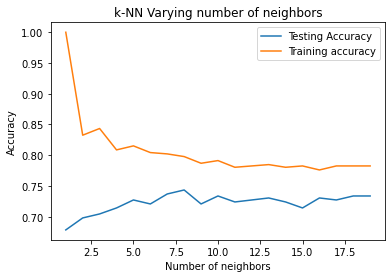

In [181]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [182]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [183]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [184]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7435064935064936

#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [185]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [186]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [187]:
confusion_matrix(y_test,y_pred)

array([[184,  17],
       [ 62,  45]])

In [189]:
confusion_matrix(y_test,y_pred)

array([[184,  17],
       [ 62,  45]])

In [190]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted Negative','Predicted Positive'],index=['Actual Negative','Actual Positive'])


,Predicted Negative,Predicted Positive
Actual Negative,184,17
Actual Positive,62,45


#### Considering confusion matrix above:

True negative = 184

False positive = 17

True postive = 45

Fasle negative = 62

Confusion matrix can also be obtained using crosstab method of pandas.



In [191]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,184,17,201
1,62,45,107
All,246,62,308


#### Classification Report

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [192]:
#import classification_report
from sklearn.metrics import classification_report

In [193]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.92      0.82       201
           1       0.73      0.42      0.53       107

    accuracy                           0.74       308
   macro avg       0.74      0.67      0.68       308
weighted avg       0.74      0.74      0.72       308



ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [52]:
y_pred_proba = knn.predict_proba(X_test)[:,1]


In [53]:
from sklearn.metrics import roc_curve


In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


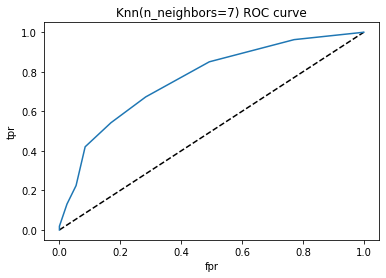

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()


In [56]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7633096201236806

#### Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

#### Hyperparameter tuning

The value of k (i.e 8) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [58]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [60]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [61]:
knn_cv.best_score_


0.7578558696205755

In [62]:
knn_cv.best_params_


{'n_neighbors': 14}

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%

,code
0,ft17_000
